<a href="https://colab.research.google.com/github/lakhbir-05/TOURISM-RECOMMENDATION-SYSTEM---INDIA/blob/main/tourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload kaggle.json
from google.colab import files
files.upload()  # Browse and upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lakhbirkaur2005","key":"1c65fc0354fade6ed0d337cebde4e7ce"}'}

In [ ]:
# Setup kaggle and download dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d kumarperiya/explore-india-a-tourist-destination-dataset
!unzip explore-india-a-tourist-destination-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/kumarperiya/explore-india-a-tourist-destination-dataset
License(s): CC0-1.0
  0% 0.00/4.22k [00:00<?, ?B/s]
100% 4.22k/4.22k [00:00<00:00, 15.2MB/s]
Archive:  explore-india-a-tourist-destination-dataset.zip
  inflating: Expanded_Indian_Travel_Dataset.csv  
  inflating: Expanded_Indian_Travel_Dataset.json  
  inflating: Expanded_Indian_Travel_Dataset_Corrected.xml  


#Reading the dataset

In [ ]:
import pandas as pd
df1 = pd.read_csv("/content/Expanded_Indian_Travel_Dataset.csv")
print("2",df1.columns)


2 Index(['Destination Name', 'State', 'Region', 'Category', 'Popular Attraction',
       'Accessibility', 'Nearest Airport', 'Nearest Railway Station'],
      dtype='object')


#EDA

🔹 Dataset shape: (110, 8)

🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Destination Name         110 non-null    object
 1   State                    110 non-null    object
 2   Region                   110 non-null    object
 3   Category                 110 non-null    object
 4   Popular Attraction       110 non-null    object
 5   Accessibility            110 non-null    object
 6   Nearest Airport          110 non-null    object
 7   Nearest Railway Station  110 non-null    object
dtypes: object(8)
memory usage: 7.0+ KB
None

🔹 Missing values:
Destination Name           0
State                      0
Region                     0
Category                   0
Popular Attraction         0
Accessibility              0
Nearest Airport            0
Nearest Railway Station    0
dtype: int64

🔹 Unique values:
Dest

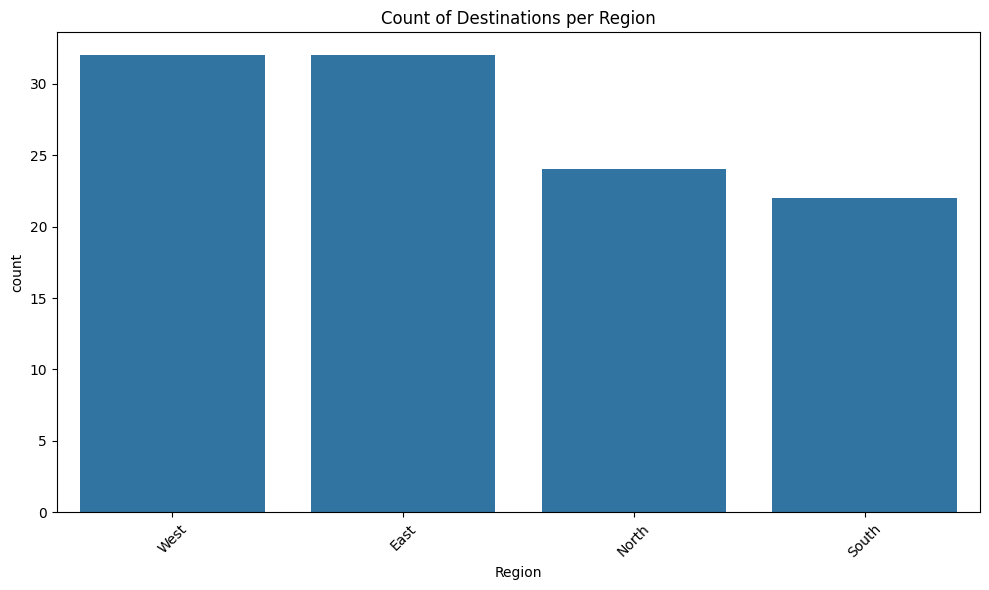

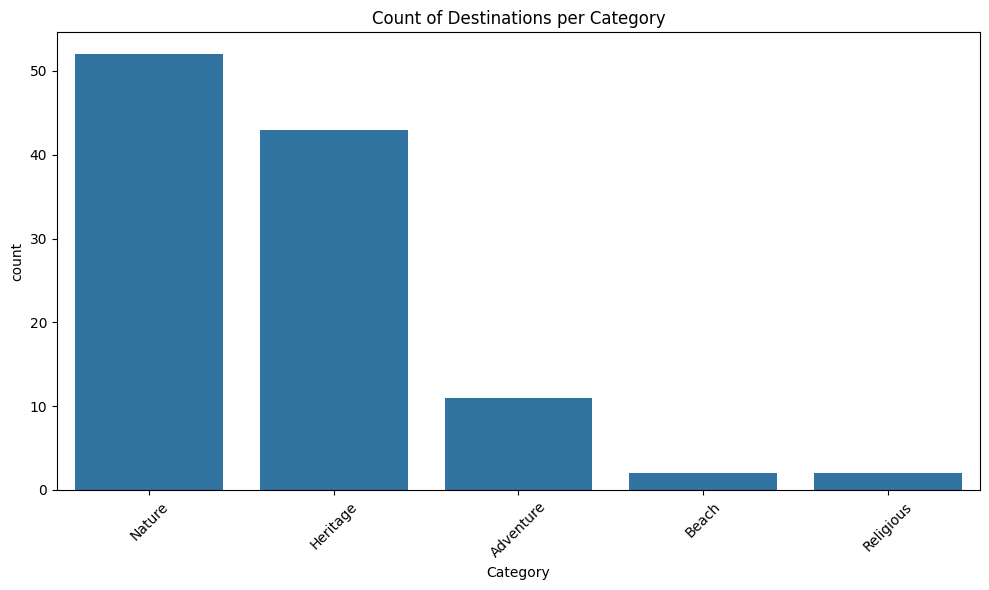

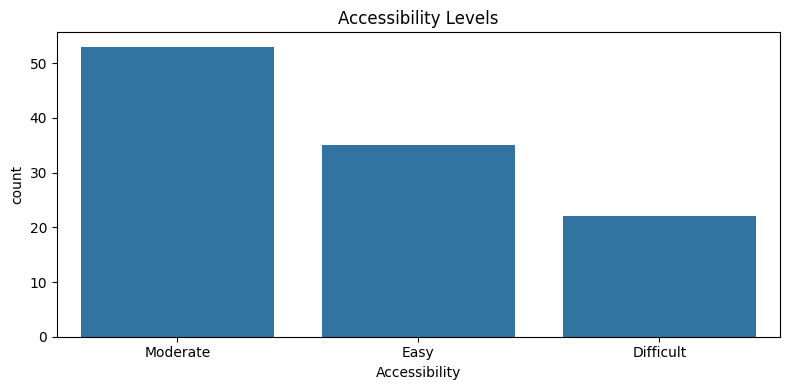

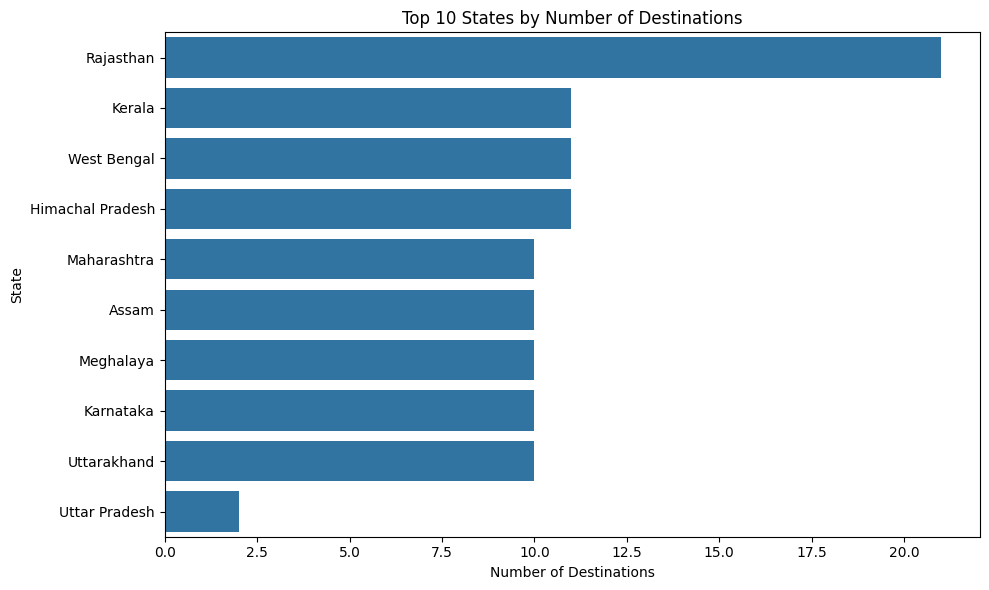


🔹 Statistics of attraction counts:
count    110.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: AttractionCount, dtype: float64


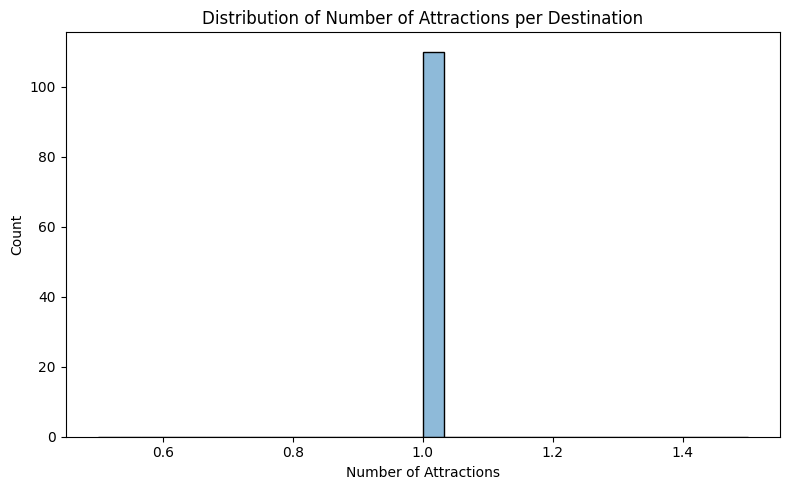


🔹 Region vs Category Crosstab:
 Category  Adventure  Beach  Heritage  Nature  Religious
Region                                                 
East              0      1         0      31          0
North            11      0         1      10          2
South             0      0        11      11          0
West              0      1        31       0          0


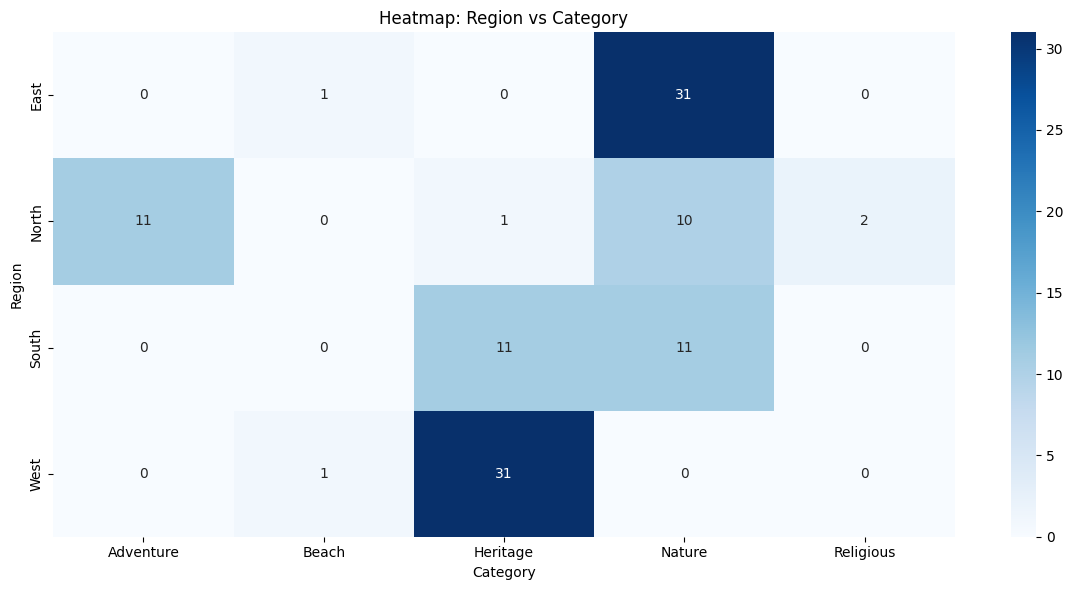


🔹 Nearest Airport missing count: 0
🔹 Nearest Railway missing count: 0


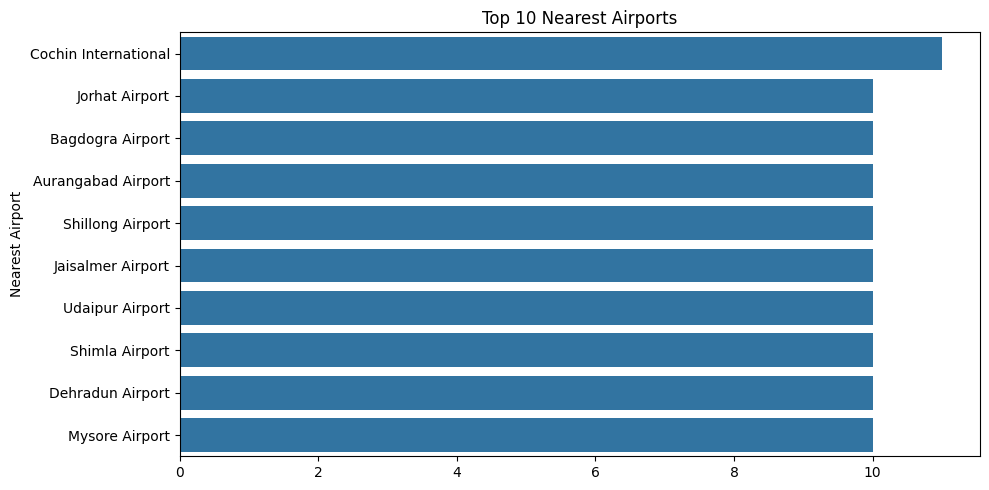

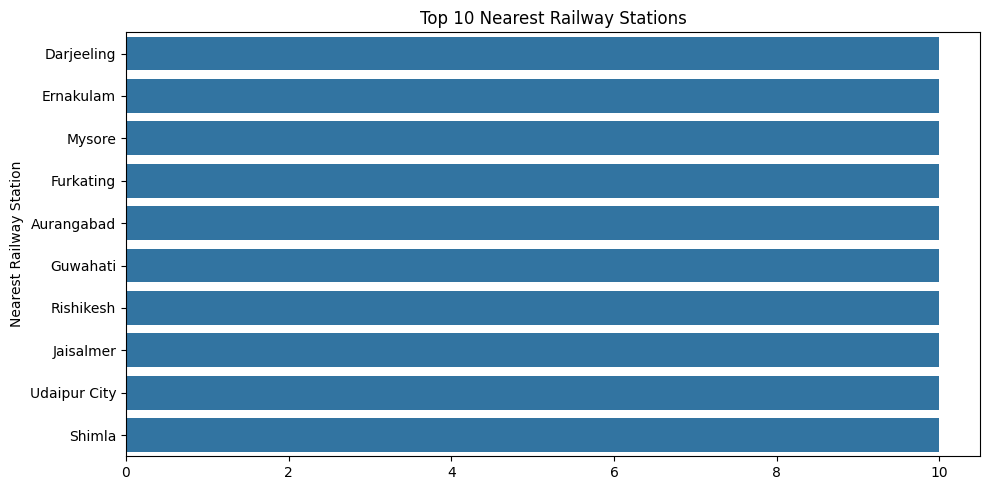

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 2. Basic overview
print("🔹 Dataset shape:", df1.shape)
print("\n🔹 Info:")
print(df1.info())
print("\n🔹 Missing values:")
print(df1.isnull().sum())

# 3. Drop if needed or fill NA
df1['Accessibility'] = df1['Accessibility'].fillna("Unknown")
df1['Popular Attraction'] = df1['Popular Attraction'].fillna("")

# 4. Unique values per column
print("\n🔹 Unique values:")
print(df1.nunique())

# 5. Value counts & distributions
print("\n🔹 Region distribution:")
print(df1['Region'].value_counts(), "\n")

print("🔹 Category distribution:")
print(df1['Category'].value_counts(), "\n")

print("🔹 Accessibility distribution:")
print(df1['Accessibility'].value_counts(), "\n")

# 6. Plot region counts
plt.figure(figsize=(10,6))
sns.countplot(data=df1, x='Region', order=df1['Region'].value_counts().index)
plt.title('Count of Destinations per Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Plot category counts
plt.figure(figsize=(10,6))
sns.countplot(data=df1, x='Category', order=df1['Category'].value_counts().index)
plt.title('Count of Destinations per Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. Accessibility bar chart
plt.figure(figsize=(8,4))
sns.countplot(data=df1, x='Accessibility', order=df1['Accessibility'].value_counts().index)
plt.title('Accessibility Levels')
plt.tight_layout()
plt.show()

# 9. Top states by number of destinations
top_states = df1['State'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title('Top 10 States by Number of Destinations')
plt.xlabel('Number of Destinations')
plt.tight_layout()
plt.show()

# 10. Attractions count per destination
df1['AttractionCount'] = df1['Popular Attraction'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
print("\n🔹 Statistics of attraction counts:")
print(df1['AttractionCount'].describe())

plt.figure(figsize=(8,5))
sns.histplot(df1['AttractionCount'], bins=30, kde=True)
plt.title('Distribution of Number of Attractions per Destination')
plt.xlabel('Number of Attractions')
plt.tight_layout()
plt.show()

# 11. Cross-tab Region vs Category
ct = pd.crosstab(df1['Region'], df1['Category'])
print("\n🔹 Region vs Category Crosstab:\n", ct)

plt.figure(figsize=(12,6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap: Region vs Category')
plt.tight_layout()
plt.show()

# 12. Nearest Airport / Railway coverage
airport_missing = df1['Nearest Airport'].isnull().sum()
railway_missing = df1['Nearest Railway Station'].isnull().sum()
print(f"\n🔹 Nearest Airport missing count: {airport_missing}")
print(f"🔹 Nearest Railway missing count: {railway_missing}")

top_airports = df1['Nearest Airport'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_airports.values, y=top_airports.index)
plt.title('Top 10 Nearest Airports')
plt.tight_layout()
plt.show()

top_rail = df1['Nearest Railway Station'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_rail.values, y=top_rail.index)
plt.title('Top 10 Nearest Railway Stations')
plt.tight_layout()
plt.show()


# 1. Accessibility Classifier (High Accuracy with Random Forest)

Goal: Predict a destination's accessibility (Good, Moderate, Poor) based on features like region, state, airport, etc.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv("Expanded_Indian_Travel_Dataset.csv")

# Drop missing accessibility
df = df[df['Accessibility'].notna()]
features = ["State", "Region", "Category", "Nearest Airport", "Nearest Railway Station"]
X = df[features].fillna("Unknown")
y = df["Accessibility"]

# Encode features
encoders = {}
for col in features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

# Encode target
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accessibility Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))


Accessibility Classification Report:

              precision    recall  f1-score   support

   Difficult       1.00      1.00      1.00         1
        Easy       0.83      0.83      0.83         6
    Moderate       0.93      0.93      0.93        15

    accuracy                           0.91        22
   macro avg       0.92      0.92      0.92        22
weighted avg       0.91      0.91      0.91        22



#2. Region + State Wise popular destinations Recommender

Goal: Recommend top destinations in a selected region and state, ranked by popularity.

In [ ]:
def recommend_by_region_state(region, state, top_n=5):
    region_df = df[
        (df["Region"].str.lower() == region.lower()) &
        (df["State"].str.lower() == state.lower())
    ]
    region_df["PopularityScore"] = region_df["Popular Attraction"].apply(
        lambda x: len(str(x).split(',')) if pd.notnull(x) else 0
    )
    top_dest = region_df.sort_values(by="PopularityScore", ascending=False)
    return top_dest[["Destination Name", "Category", "Popular Attraction", "PopularityScore"]].head(top_n)

# Example
print(recommend_by_region_state("North", "Punjab"))


  Destination Name   Category Popular Attraction  PopularityScore
7         Amritsar  Religious      Golden Temple                1


/tmp/ipython-input-1935318695.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df["PopularityScore"] = region_df["Popular Attraction"].apply(


# 3. Content-Based Destination Recommender (TF-IDF + Cosine Similarity)

Goal: Recommend similar destinations based on combined text features.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df["Combined_Features"] = df[["State", "Region", "Category", "Popular Attraction"]].fillna("").agg(" ".join, axis=1)

# Vectorization
vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(df["Combined_Features"])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
indices = pd.Series(df.index, index=df["Destination Name"].str.lower())

def recommend_similar_destinations(name, top_n=5):
    name = name.lower()
    if name not in indices:
        return ["Destination not found."]
    idx = indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    destination_indices = [i[0] for i in sim_scores]
    return df["Destination Name"].iloc[destination_indices].tolist()

# Example
print(recommend_similar_destinations("Jaipur"))


['Jaisalmer', 'Jaisalmer', 'Jaisalmer', 'Jaisalmer', 'Jaisalmer']


#4. Multi-Class Category Classifier (e.g., Historical, Wildlife, Beach, etc.)

Goal: Predict the category of a destination based on state, region, accessibility, etc.

In [ ]:
category_df = df[df['Category'].notna()]
X_cat = category_df[["State", "Region", "Accessibility"]].fillna("Unknown")
y_cat = category_df["Category"]

# Encode
for col in X_cat.columns:
    X_cat[col] = LabelEncoder().fit_transform(X_cat[col])
y_cat_encoded = LabelEncoder().fit_transform(y_cat)

X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat_encoded, test_size=0.2, random_state=42)
clf_cat = RandomForestClassifier(n_estimators=150, random_state=42)
clf_cat.fit(X_train, y_train)

# Report
y_pred = clf_cat.predict(X_test)
print("Destination Category Classifier Report:\n")
print(classification_report(y_test, y_pred))


Destination Category Classifier Report:

              precision    recall  f1-score   support

           2       1.00      0.91      0.95        11
           3       0.91      1.00      0.95        10
           4       0.00      0.00      0.00         1

    accuracy                           0.91        22
   macro avg       0.64      0.64      0.63        22
weighted avg       0.91      0.91      0.91        22



In [ ]:
!kaggle datasets download kirtandwivedi02/most-traveled-cities-in-india


Dataset URL: https://www.kaggle.com/datasets/kirtandwivedi02/most-traveled-cities-in-india
License(s): MIT
  0% 0.00/7.66k [00:00<?, ?B/s]
100% 7.66k/7.66k [00:00<00:00, 32.8MB/s]


In [ ]:
!mkdir -p india_cities
!unzip most-traveled-cities-in-india.zip -d india_cities






Archive:  most-traveled-cities-in-india.zip
  inflating: india_cities/holidify.csv  


#dataset 2nd

In [ ]:
import pandas as pd
df = pd.read_csv("/content/india_cities/holidify.csv")
df.head()

,Id,City,Rating,About the city (long Description),Best Time to visit
0,1,Gangtok,4.6,"Incredibly alluring, pleasantly boisterous and...",Throughout the year
1,2,Udaipur,4.6,"Udaipur, the ""City of Lakes,"" stands as a jewe...",October to March
2,3,Gulmarg,4.4,Situated at an altitude of 2730 m above sea le...,October to June
3,4,Agra,4.9,Located on the banks of River Yamuna in Uttar ...,October to March
4,5,Andaman and Nicobar,4.6,Replete with turquoise blue water beaches and ...,October to Jun


Data Cleaning and Preprocessing

In [ ]:
# Data Cleaning and Preprocessing

# Display the data info
df.info()

# Check for missing values
print('\nMissing values in each column:')
print(df.isnull().sum())

# Drop duplicates if any exist
initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f'Number of duplicates dropped: {initial_shape[0] - df.shape[0]}')

# For textual columns, we can fill missing values with a placeholder if needed
for col in ['City', 'About the city (long Description)', 'Best Time to visit']:
    if df[col].isnull().sum() > 0:
        df[col].fillna('Unknown', inplace=True)

# If the rating column has missing values, consider filling with median value
if df['Rating'].isnull().sum() > 0:
    median_rating = df['Rating'].median()
    df['Rating'].fillna(median_rating, inplace=True)

print('Data cleaning completed.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Id                                 71 non-null     int64  
 1   City                               71 non-null     object 
 2   Rating                             71 non-null     float64
 3   About the city (long Description)  71 non-null     object 
 4   Best Time to visit                 71 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.9+ KB

Missing values in each column:
Id                                   0
City                                 0
Rating                               0
About the city (long Description)    0
Best Time to visit                   0
dtype: int64
Number of duplicates dropped: 0
Data cleaning completed.


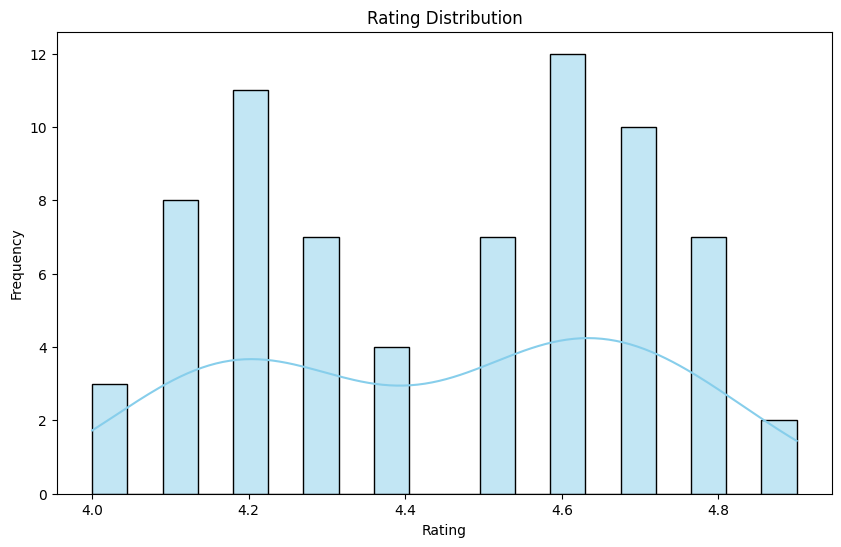

/tmp/ipython-input-701201471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='City', data=df, order=df['City'].value_counts().index, palette='viridis')


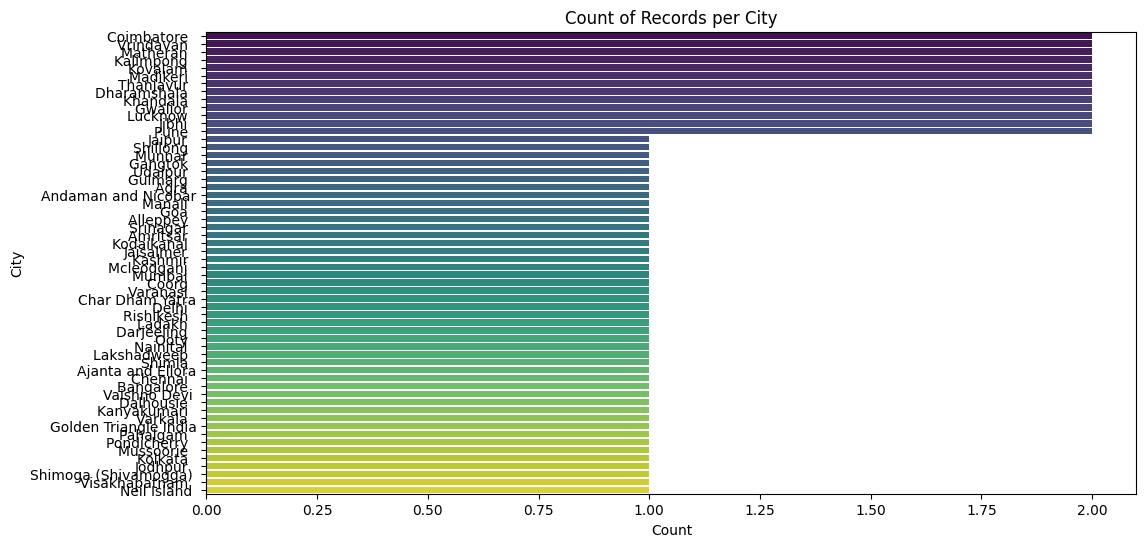

/tmp/ipython-input-701201471.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Best Time to visit', y='Rating', data=df, palette='Set2')


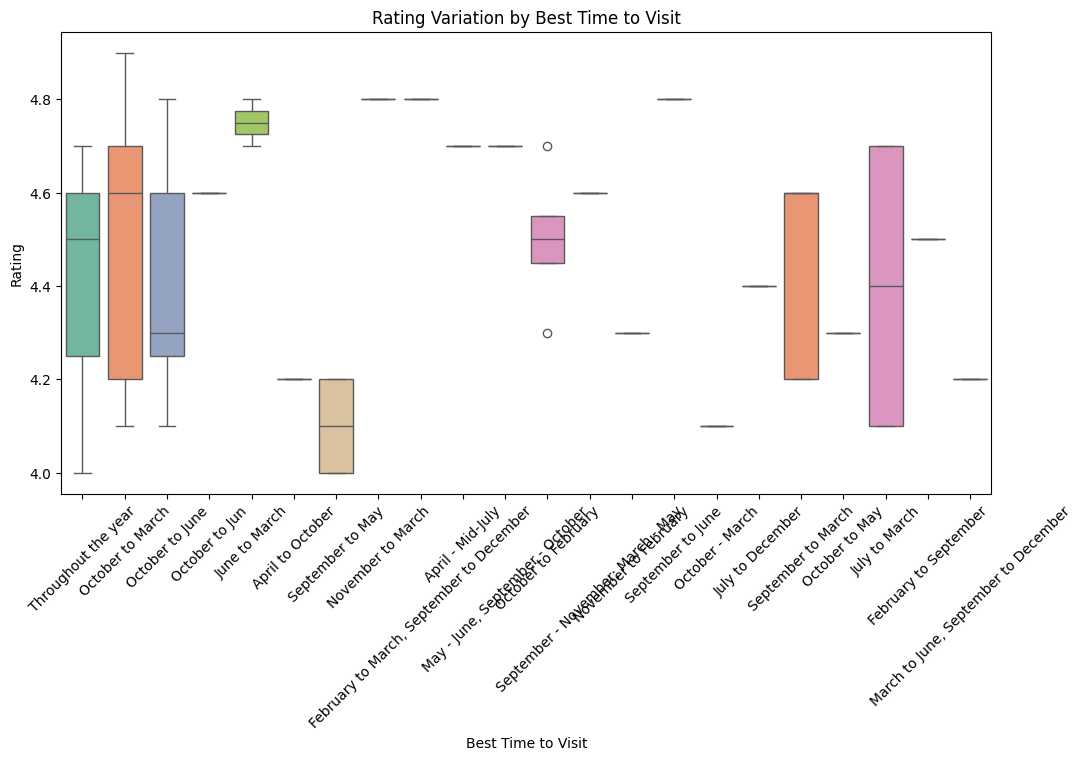

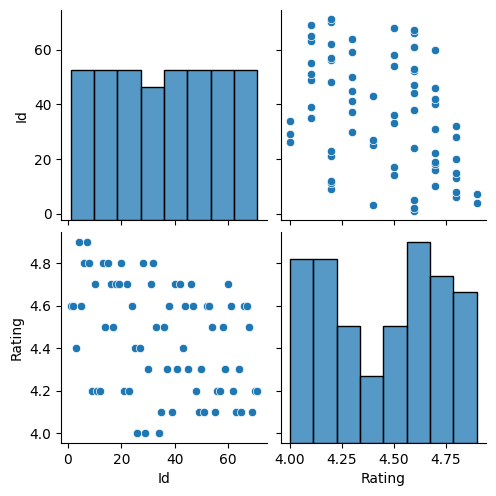

In [ ]:
# Exploratory Data Analysis (EDA)
import numpy as np
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True, bins=20, color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Count plot for Cities
plt.figure(figsize=(12, 6))
sns.countplot(y='City', data=df, order=df['City'].value_counts().index, palette='viridis')
plt.title('Count of Records per City')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

# Box Plot for Ratings based on 'Best Time to visit'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Best Time to visit', y='Rating', data=df, palette='Set2')
plt.title('Rating Variation by Best Time to Visit')
plt.xlabel('Best Time to Visit')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# Pairplot for numeric columns
# We have only two numeric columns (Id and Rating). Still, we show a pairplot for demonstration.
numeric_df = df.select_dtypes(include=[np.number])
sns.pairplot(numeric_df, diag_kind='hist')
plt.show()


In [ ]:
# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

Training set shape: (56, 3)
Testing set shape: (15, 3)
Prediction Accuracy: 0.53
ROC AUC Score: 0.96


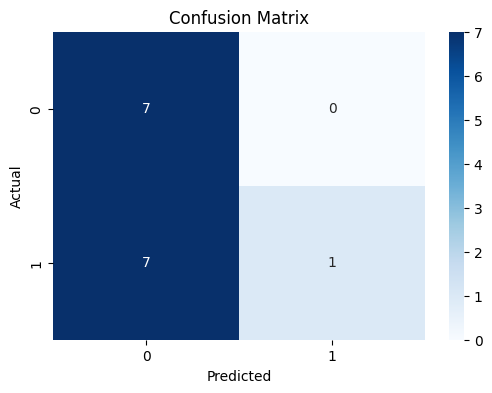

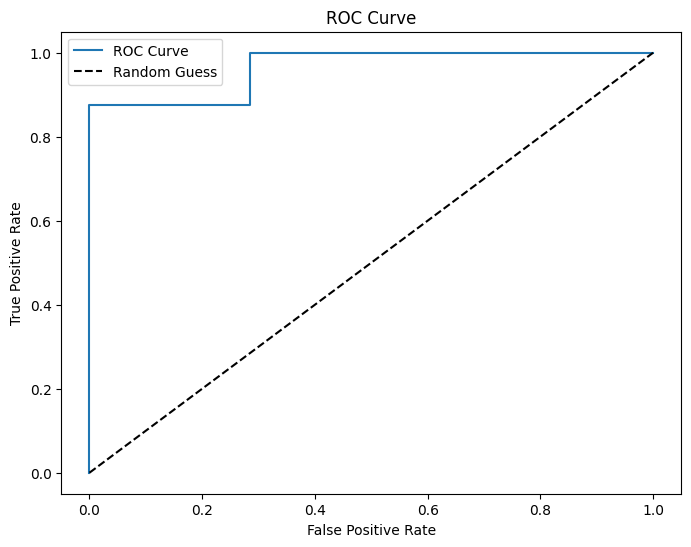

In [ ]:
 #Predictor: Rating Classification

from sklearn.metrics import roc_auc_score

# Create a binary target variable: 1 for high rating and 0 for low rating
median_rating = df['Rating'].median()
df['High_Rating'] = (df['Rating'] > median_rating).astype(int)

# Select features and target
features = ['City', 'Best Time to visit', 'About the city (long Description)']
target = 'High_Rating'

X = df[features]
y = df[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

# Building the preprocessing pipelines for both types of features

text_column = 'About the city (long Description)'
categorical_columns = ['City', 'Best Time to visit']

# Pipeline for the text data using TF-IDF
text_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=200))
])

# Pipeline for categorical data using OneHotEncoder
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('text', text_pipeline, text_column),
    ('cat', categorical_pipeline, categorical_columns)
])

# Create the full pipeline with a Logistic Regression classifier
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)
y_prob = model_pipeline.predict_proba(X_test)[:,1]

# Calculate prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'Prediction Accuracy: {accuracy:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve Visualization
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#wheather prediction

In [ ]:

# Upload your kaggle.json (get it from your Kaggle account settings)
from google.colab import files
files.upload()  # upload kaggle.json here

# Setup kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install and download dataset
!pip install -q kaggle
!kaggle datasets download -d muthuj7/weather-dataset
!unzip -q weather-dataset.zip


Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/muthuj7/weather-dataset
License(s): CC0-1.0
  0% 0.00/2.23M [00:00<?, ?B/s]
100% 2.23M/2.23M [00:00<00:00, 604MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv("weatherHistory.csv")
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [ ]:
# Drop irrelevant columns (like formatted dates)
df = df.drop(columns=["Formatted Date", "Summary", "Daily Summary"])

# Handle missing values
df = df.dropna()

# Convert temperature from Fahrenheit to Celsius
df["TemperatureC"] = (df["Temperature (C)"] - 32) * 5.0/9.0

# Create custom temperature label
def classify_temp(temp):
    if temp > 30:
        return "Hot"
    elif temp >= 20:
        return "Moderate"
    else:
        return "Cold"

df["TempClass"] = df["Temperature (C)"].apply(classify_temp)
# Features for both tasks
features = df[['Temperature (C)', 'Humidity', 'Pressure (millibars)', 'Wind Speed (km/h)']]

# Rain Prediction Label (binary: 0 or 1)
df['RainToday'] = (df['Precip Type'] == 'rain').astype(int)
rain_label = df['RainToday']

# Temperature Classification Label (Hot/Moderate/Cold)
temp_label = df['TempClass']
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split for rain prediction
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(features, rain_label, test_size=0.2, random_state=42)

# Train Rain Model
rain_model = RandomForestClassifier()
rain_model.fit(X_train_r, y_train_r)
y_pred_r = rain_model.predict(X_test_r)

print("Rain Prediction Report:")
print(classification_report(y_test_r, y_pred_r))
# Split for temperature classification
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(features, temp_label, test_size=0.2, random_state=42)

# Train Temp Model
temp_model = RandomForestClassifier()
temp_model.fit(X_train_t, y_train_t)
y_pred_t = temp_model.predict(X_test_t)

print("Temperature Classification Report:")
print(classification_report(y_test_t, y_pred_t))
# Example input
sample = [[28, 0.75, 1010, 10]]  # [Temp, Humidity, Pressure, Wind Speed]

rain_pred = rain_model.predict(sample)
temp_pred = temp_model.predict(sample)

print("Rain Today:", "Yes" if rain_pred[0] else "No")
print("Temperature:", temp_pred[0])


Rain Prediction Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2098
           1       1.00      1.00      1.00     17090

    accuracy                           1.00     19188
   macro avg       1.00      1.00      1.00     19188
weighted avg       1.00      1.00      1.00     19188

Temperature Classification Report:
              precision    recall  f1-score   support

        Cold       1.00      1.00      1.00     15062
         Hot       1.00      1.00      1.00       517
    Moderate       1.00      1.00      1.00      3609

    accuracy                           1.00     19188
   macro avg       1.00      1.00      1.00     19188
weighted avg       1.00      1.00      1.00     19188

Rain Today: Yes
Temperature: Moderate


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


✅ 🌧️ Accuracy for Rain Prediction

Rain Prediction Accuracy: 1.00
Rain Prediction Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2098
           1       1.00      1.00      1.00     17090

    accuracy                           1.00     19188
   macro avg       1.00      1.00      1.00     19188
weighted avg       1.00      1.00      1.00     19188



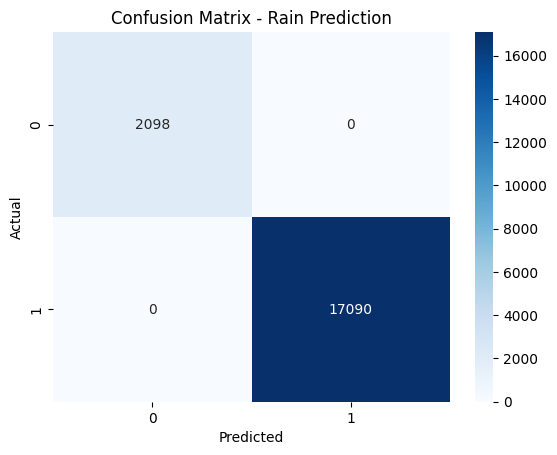

In [ ]:
# Predict on test data
y_pred_r = rain_model.predict(X_test_r)

# Accuracy
acc_rain = accuracy_score(y_test_r, y_pred_r)
print(f"Rain Prediction Accuracy: {acc_rain:.2f}")

# Classification report
print("Rain Prediction Report:")
print(classification_report(y_test_r, y_pred_r))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test_r, y_pred_r), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Rain Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


✅ 🌡️ Accuracy for Temperature Classification

Temperature Classification Accuracy: 1.00
Temperature Classification Report:
              precision    recall  f1-score   support

        Cold       1.00      1.00      1.00     15062
         Hot       1.00      1.00      1.00       517
    Moderate       1.00      1.00      1.00      3609

    accuracy                           1.00     19188
   macro avg       1.00      1.00      1.00     19188
weighted avg       1.00      1.00      1.00     19188



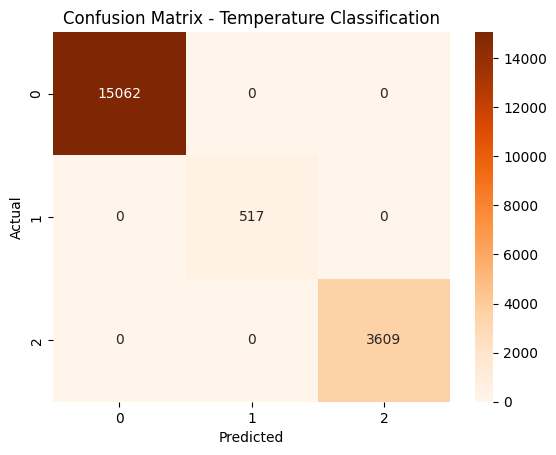

In [ ]:
# Predict on test data
y_pred_t = temp_model.predict(X_test_t)

# Accuracy
acc_temp = accuracy_score(y_test_t, y_pred_t)
print(f"Temperature Classification Accuracy: {acc_temp:.2f}")

# Classification report
print("Temperature Classification Report:")
print(classification_report(y_test_t, y_pred_t))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test_t, y_pred_t), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Temperature Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import pickle

# Save rain model
with open('weather_model.pkl', 'wb') as f:
    pickle.dump(rain_model, f)

# Save temperature model
with open('temp_model.pkl', 'wb') as f:
    pickle.dump(temp_model, f)


In [ ]:
import joblib
from google.colab import files
# 1. Accessibility Model + Encoders
#joblib.dump(clf, "accessibility_model.pkl")
joblib.dump(encoders, "feature_encoders.pkl")
#joblib.dump(target_encoder, "target_encoder.pkl")


['feature_encoders.pkl']

In [ ]:
import joblib
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(cosine_sim, 'cosine_similarity.pkl')
joblib.dump(clf, 'accessibility_classifier.pkl')
joblib.dump(encoders, 'accessibility_encoders.pkl')
joblib.dump(target_encoder, 'accessibility_target_encoder.pkl')
joblib.dump(model_pipeline, 'rating_classifier_pipeline.pkl')
joblib.dump(rain_model, 'rain_prediction_model.pkl')
joblib.dump(temp_model, 'temperature_classification_model.pkl')


['temperature_classification_model.pkl']

In [ ]:
from google.colab import files

# Download individual files
files.download('tfidf_vectorizer.pkl')
files.download('cosine_similarity.pkl')

files.download('accessibility_classifier.pkl')
files.download('accessibility_encoders.pkl')
files.download('accessibility_target_encoder.pkl')

files.download('rating_classifier_pipeline.pkl')

files.download('rain_prediction_model.pkl')
files.download('temperature_classification_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>